<a href="https://colab.research.google.com/github/DhirajBaruah/EDA_PD_REGRESSION/blob/main/EDA_PD_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64

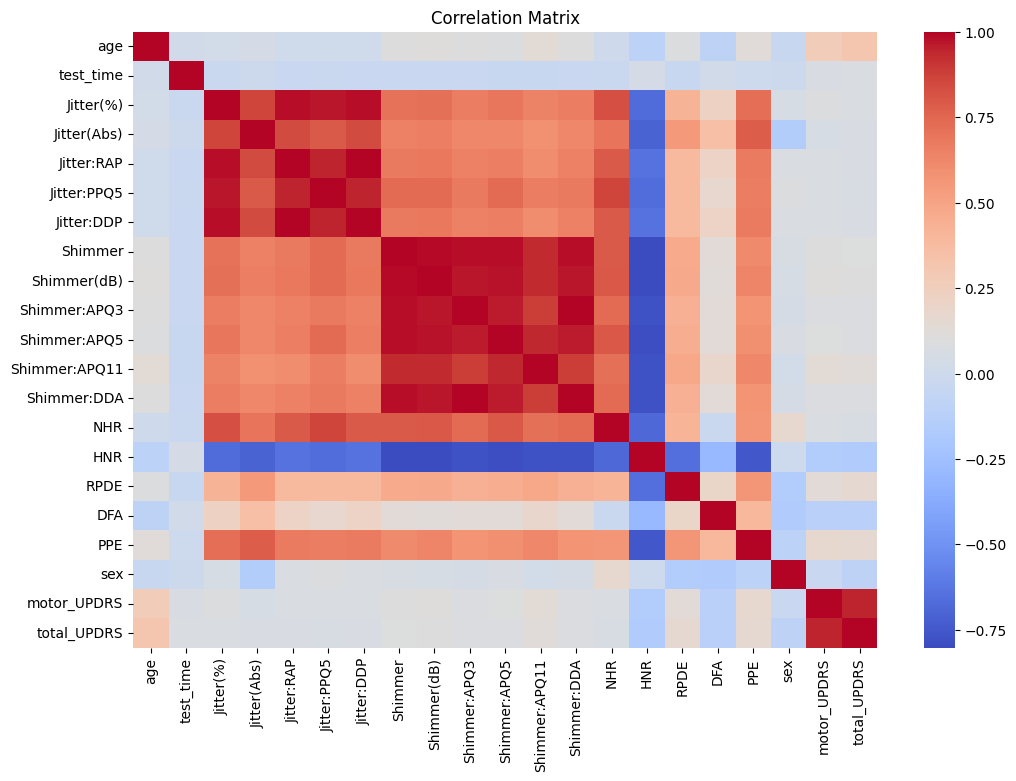

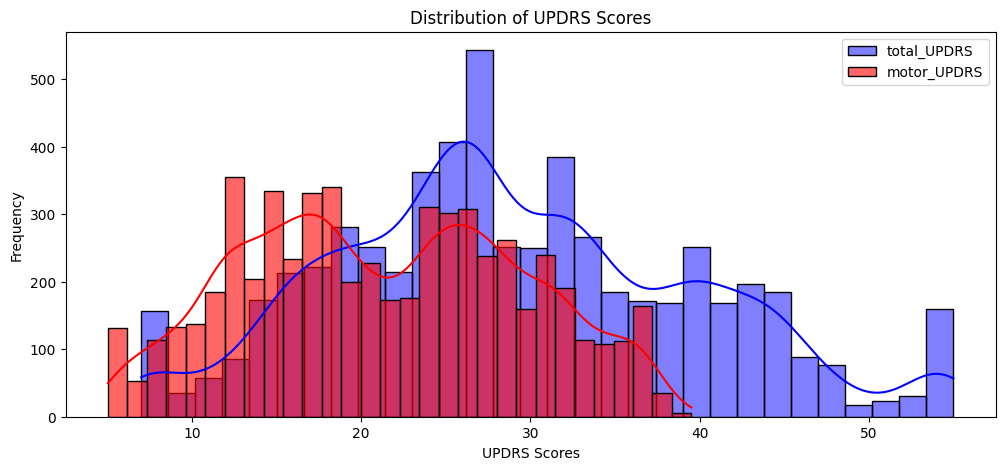

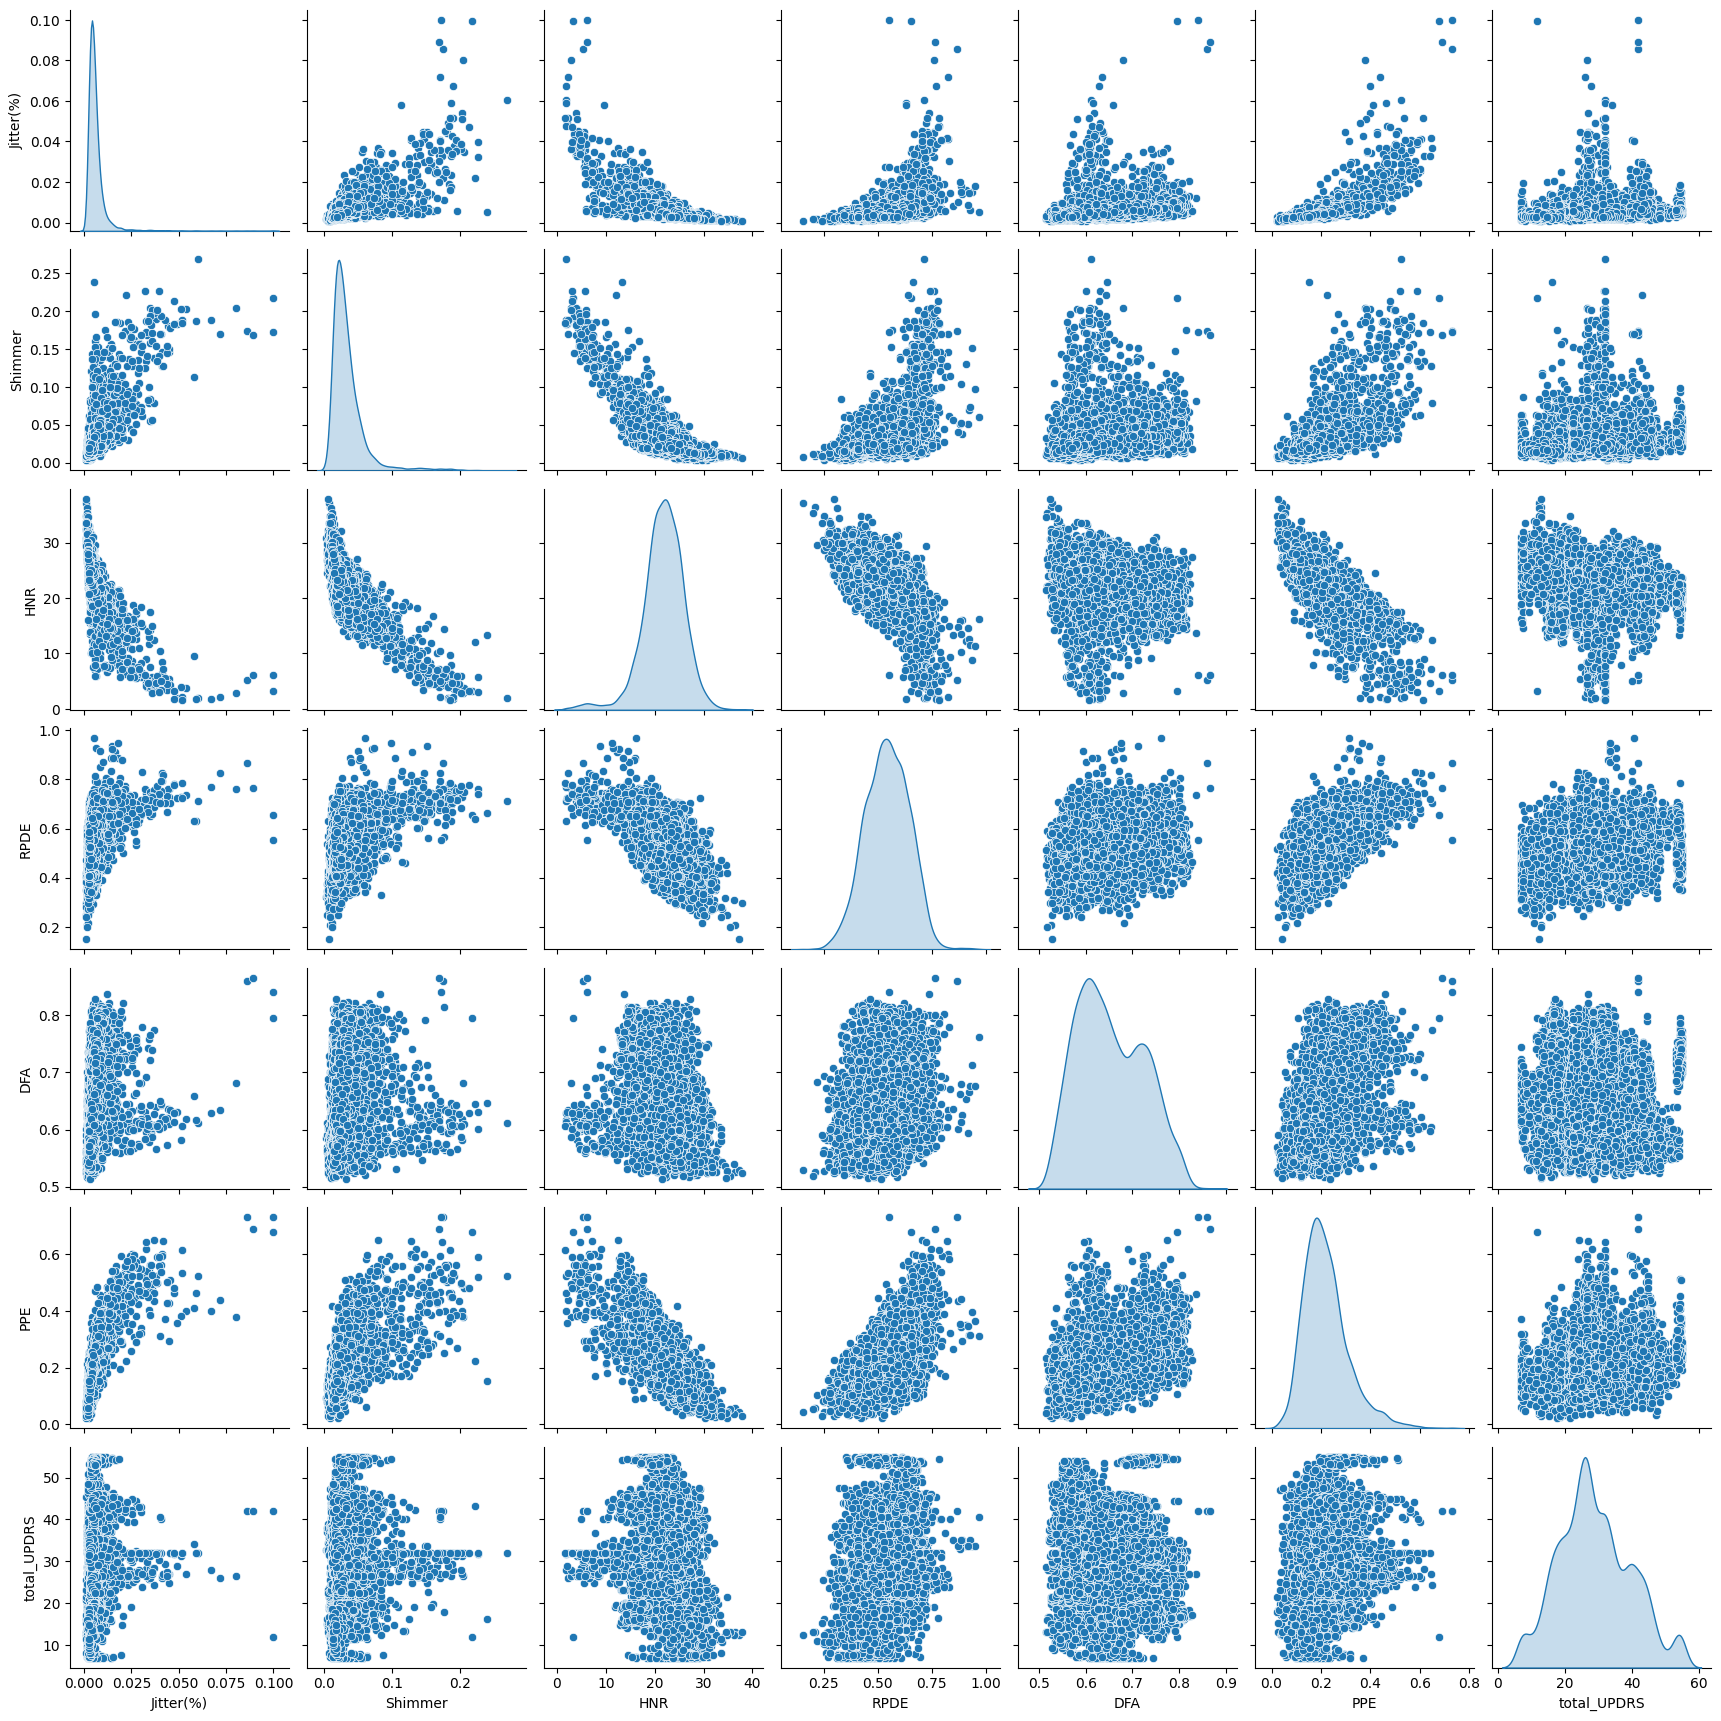

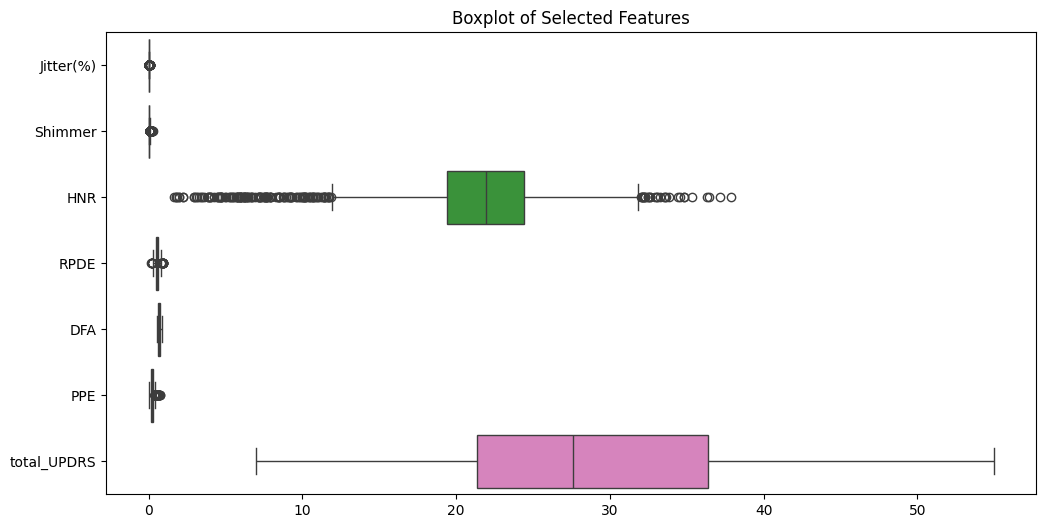


Feature Correlation with total_UPDRS:
total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066926
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64


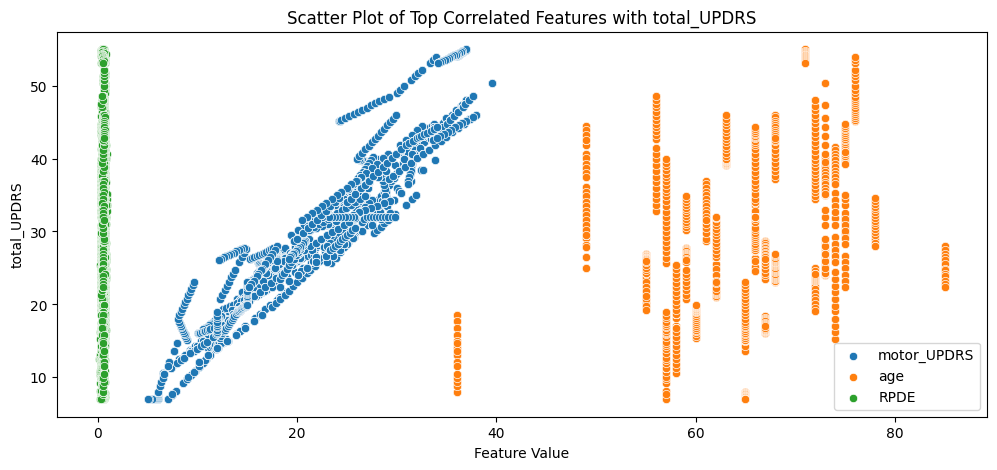

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
parkinsons = fetch_ucirepo(id=189)
df = pd.concat([parkinsons.data.features, parkinsons.data.targets], axis=1)

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

# Distribution of target variables
plt.figure(figsize=(12, 5))
sns.histplot(df['total_UPDRS'], bins=30, kde=True, color='blue', label='total_UPDRS')
sns.histplot(df['motor_UPDRS'], bins=30, kde=True, color='red', label='motor_UPDRS', alpha=0.6)
plt.xlabel("UPDRS Scores")
plt.ylabel("Frequency")
plt.title("Distribution of UPDRS Scores")
plt.legend()
plt.show()

# Pairplot of selected features
selected_features = ['Jitter(%)', 'Shimmer', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_features], orient='h')
plt.title("Boxplot of Selected Features")
plt.show()

# Checking feature correlations with total_UPDRS
correlation_with_target = df.corr()["total_UPDRS"].sort_values(ascending=False)
print("\nFeature Correlation with total_UPDRS:")
print(correlation_with_target)

# Scatter plot of most correlated features
top_correlated_features = correlation_with_target.index[1:4]  # Top 3 features (excluding total_UPDRS itself)
plt.figure(figsize=(12, 5))
for feature in top_correlated_features:
    sns.scatterplot(x=df[feature], y=df['total_UPDRS'], label=feature)
plt.xlabel("Feature Value")
plt.ylabel("total_UPDRS")
plt.title("Scatter Plot of Top Correlated Features with total_UPDRS")
plt.legend()
plt.show()
